In [1]:
# import libraries 

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import plotly.express as px

df = pd.read_csv(r'/Users/violet/survey.csv')

In [4]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

### Columns description:

1. Timestamp
2. Age
3. Gender
4. Country
5. state: If you live in the United States, which state or territory do you live in?
6. self_employed: Are you self-employed?
7. family_history: Do you have a family history of mental illness?
8. treatment: Have you sought treatment for a mental health condition?
9. work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
10. no_employees: How many employees does your company or organization have?
11. remote_work: Do you work remotely (outside of an office) at least 50% of the time?
12. tech_company: Is your employer primarily a tech company/organization?
13. benefits: Does your employer provide mental health benefits?
14. care_options: Do you know the options for mental health care your employer provides?
15. wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
16. seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
17. anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
18. leave: How easy is it for you to take medical leave for a mental health condition?
19. mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
20. phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
21. coworkers: Would you be willing to discuss a mental health issue with your coworkers?
22. supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
23. mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?
24. phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?
25. mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?
26. obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
27. comments: Any additional notes or comments

In [2]:
#drop unnecessary columns

df = df.drop(["Timestamp", "state"], axis = 1)

In [18]:
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [10]:
#check for missing data 

df.isnull().sum()

Age                             0
Gender                          0
Country                         0
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [19]:
#Percent of missing 

pct_missing = (df.isnull().sum().sort_values(ascending = False)/len(df))*100
pct_missing

comments                     86.973789
work_interfere               20.969023
self_employed                 1.429706
anonymity                     0.000000
obs_consequence               0.000000
mental_vs_physical            0.000000
phys_health_interview         0.000000
mental_health_interview       0.000000
supervisor                    0.000000
coworkers                     0.000000
phys_health_consequence       0.000000
mental_health_consequence     0.000000
leave                         0.000000
Age                           0.000000
seek_help                     0.000000
Gender                        0.000000
care_options                  0.000000
benefits                      0.000000
tech_company                  0.000000
remote_work                   0.000000
no_employees                  0.000000
treatment                     0.000000
family_history                0.000000
Country                       0.000000
wellness_program              0.000000
dtype: float64

In [3]:
#drop comments column as well 

df = df.drop("comments", axis = 1)

In [43]:
df.shape

(1250, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   self_employed              1241 non-null   object
 4   family_history             1259 non-null   object
 5   treatment                  1259 non-null   object
 6   work_interfere             995 non-null    object
 7   no_employees               1259 non-null   object
 8   remote_work                1259 non-null   object
 9   tech_company               1259 non-null   object
 10  benefits                   1259 non-null   object
 11  care_options               1259 non-null   object
 12  wellness_program           1259 non-null   object
 13  seek_help                  1259 non-null   object
 14  anonymit

In [4]:
#check unique values in Gender column 
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [5]:
df['Gender'].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [6]:
df['Gender'] = df['Gender'].replace(['male', 'M', 'm', 'Make', 'Man', 'Cis Male', 'Male ', 'Cis Man', 'Mail', 'Malr', 'msle', 'cis male', 'Mal', 'Male (CIS)', 'maile'], 'Male')
df['Gender'] = df['Gender'].replace(['female', 'F', 'f', 'Woman', 'femail', 'femake', 'Female ', 'cis-female/femme', 'Female (cis)', 'woman', 'Femake', 'Cis Female'], 'Female')
df['Gender'] = df['Gender'].replace(['Male-ish', 'Trans-female',
       'something kinda male?', 'queer/she/they', 'non-binary', 'Nah',
       'All', 'Enby', 'fluid', 'Genderqueer', 'Androgyne', 'Agender',
       'Guy (-ish) ^_^', 'male leaning androgynous', 'Trans woman',
       'Neuter', 'Female (trans)', 'queer', 'A little about you', 'p',
       'ostensibly male, unsure what that really means'], 'Other')

In [7]:
df['Gender'].value_counts()

Male      990
Female    247
Other      22
Name: Gender, dtype: int64

<BarContainer object of 3 artists>

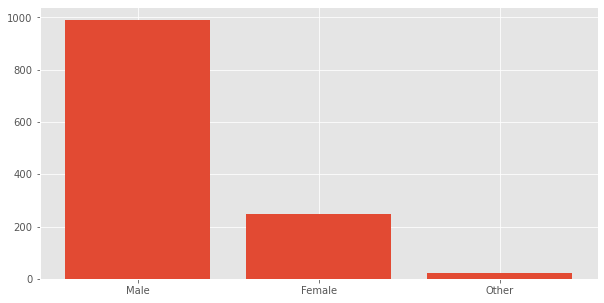

In [24]:
plt.figure(figsize=(10,5))
plt.bar(df.Gender.value_counts().index, df.Gender.value_counts())

Majority men answered the survey because more men work in the Tech industry 

In [26]:
df['treatment'].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

In [41]:
plt.figure(figsize=(10,5))
px.histogram(df, x = 'treatment', color='treatment', text_auto=True)

<Figure size 720x360 with 0 Axes>

Almost 50/50 split between those seeking treatment and those not. 

In [9]:
df = df[df.Age>15]
df = df[df.Age<70]

In [10]:
px.histogram(df, x = 'Age', color= 'treatment' )

<AxesSubplot:xlabel='Gender', ylabel='count'>

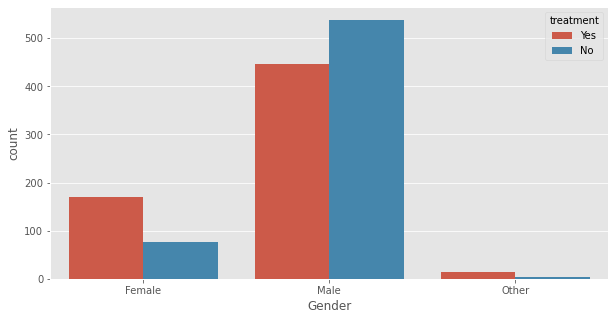

In [39]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'Gender', hue = 'treatment')

<AxesSubplot:xlabel='work_interfere', ylabel='count'>

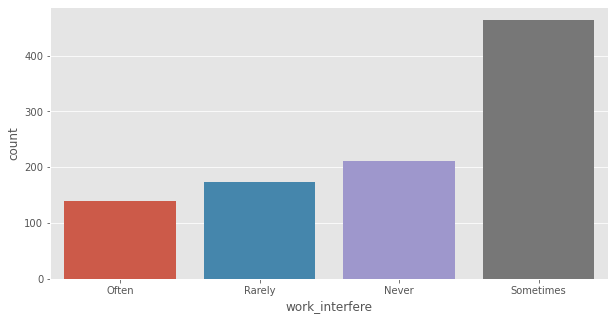

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'work_interfere')

In [34]:
df['work_interfere'].value_counts()

Sometimes    464
Never        211
Rarely       173
Often        140
Name: work_interfere, dtype: int64

In [38]:
px.histogram(df, x = 'work_interfere', color= 'treatment', text_auto=True, barmode = 'group' )

Seems there may be some correlation between work interference and whether someone has sought treatment. 

In [91]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [37]:
px.histogram(df, x = 'remote_work', color= 'treatment', text_auto=True, barmode = 'group' )

In [98]:
countries = df['Country'].value_counts()
countries[:10]

United States     745
United Kingdom    184
Canada             72
Germany            45
Netherlands        27
Ireland            27
Australia          21
France             13
India              10
New Zealand         8
Name: Country, dtype: int64

In [22]:
top_countries = df[df['Country'].isin(['United States','United Kingdom', 'Canada', 'Germany', 'Netherlands', 'Ireland', 'Australia', 'France'])]

In [42]:
plt.figure(figsize = (10,5))
px.histogram(top_countries, x = 'Country', color= 'treatment', text_auto=True, barmode = 'group' )

<Figure size 720x360 with 0 Axes>

1. Most of the people who completed the survey are from the US 
2. Of the people in the US, more have sought treatment than not 
3. It is pretty evenly split in other countries except France/Netherlands where less have sought treatment

<AxesSubplot:>

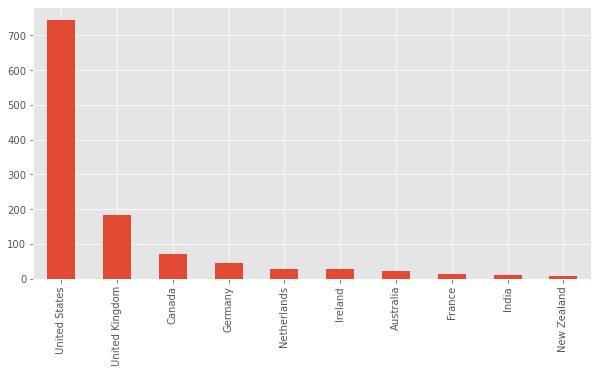

In [103]:
plt.figure(figsize = (10,5))
countries[:10].plot(kind='bar')

In [40]:
df.head(10)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33,Male,United States,NaN,Yes,No,Sometimes,6-25,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,35,Female,United States,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,39,Male,Canada,NaN,No,No,Never,1-5,Yes,Yes,...,Yes,Don't know,No,No,No,No,No,No,No,No
8,42,Female,United States,NaN,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,23,Male,Canada,NaN,No,No,Never,26-100,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


Text(0.5, 1.0, 'Do you feel that your employer takes mental health as seriously as physical health')

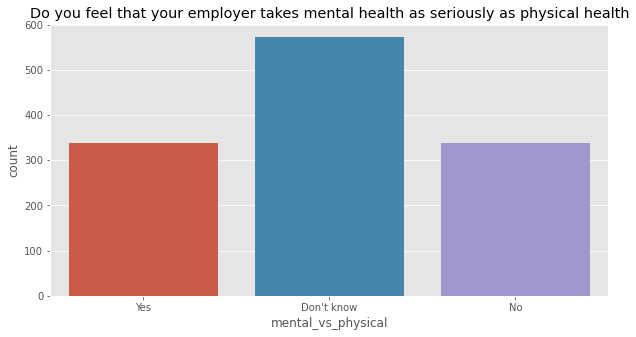

In [20]:
# Let's check thoughts about mental vs physical health 

plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'mental_vs_physical')
plt.title('Do you feel that your employer takes mental health as seriously as physical health')

Most don't know

In [36]:
px.histogram(df, x = 'mental_health_interview', 
             text_auto=True,
             title= 'Would you bring up a mental health issue with a potential employer in an interview?')

In [34]:
px.histogram(df, x = 'phys_health_interview', 
             text_auto=True,
             title='Would you bring up a physical health issue with a potential employer in an interview?')

People generally feel less comfortable bringing up mental health issues with potential employers.
Unlike physical health issues, most wouldn't even consider bringing up mental health issues. 

In [33]:
px.histogram(df, x = 'mental_health_consequence',
             text_auto=True, 
             title= 'Do you think that discussing a mental health issue with your employer would have negative consequences?')

In [35]:
px.histogram(df, x = 'phys_health_consequence', 
             text_auto=True, 
             title= 'Do you think that discussing a physical health issue with your employer would have negative consequences?')

    Most people think bringing up mental health issues would be less appropriate than physical health issues

<AxesSubplot:title={'center':'Is your anonymity protected if you choose to take advantage of treatment resources?'}, xlabel='anonymity', ylabel='count'>

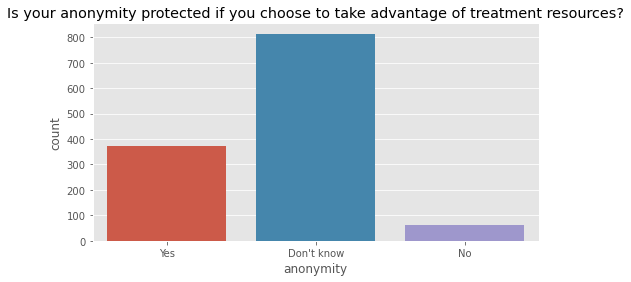

In [28]:
plt.figure(figsize=(8,4))
plt.title('Is your anonymity protected if you choose to take advantage of treatment resources?')
sns.countplot(data = df , x = 'anonymity')

Most people probably don't feel comfortable taking advantage of resources because they don't know how it will affect them at work and whether their anonymity will be protected. 

Text(0.5, 1.0, 'Does your employer provide mental health benefits')

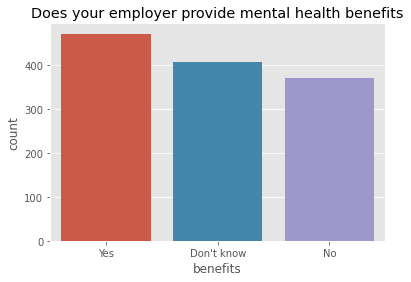

In [43]:
sns.countplot(data = df , x = 'benefits')
plt.title('Does your employer provide mental health benefits')

Text(0.5, 1.0, 'Does your employer provide resources to learn more about mental health issues and how to seek help?')

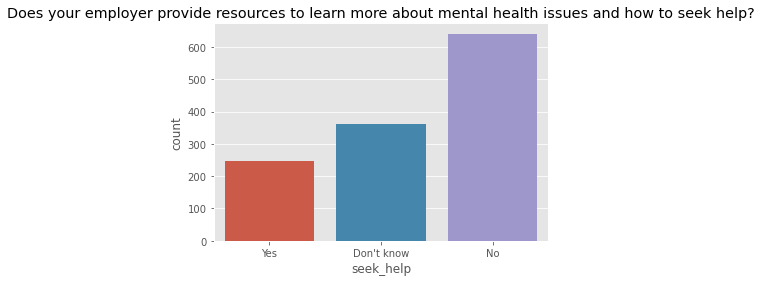

In [46]:
sns.countplot(data = df , x = 'seek_help')
plt.title('Does your employer provide resources to learn more about mental health issues and how to seek help?')

Text(0.5, 1.0, 'Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?')

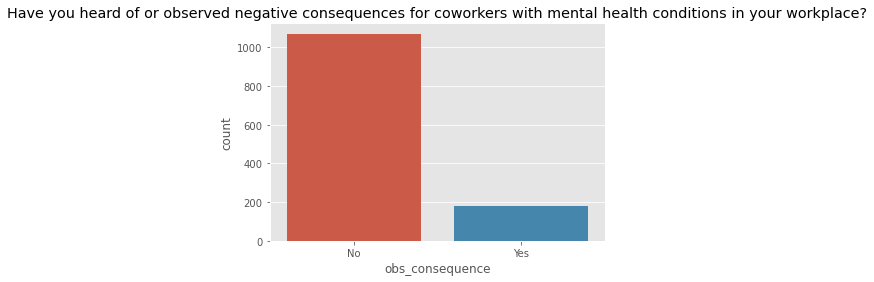

In [48]:
sns.countplot(data = df , x = 'obs_consequence')
plt.title('Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?')

### Some thoughts
1. This survey was taken in 2014, so it would be interesting to see how the conversation around mental health has changed.
2. It would be interesting to see data in the last 2.5 years on remote work vs mental health. 
3. It seems like employees either weren't aware of what employers offered or they felt that needs were not met. 
4. General consensus seems to be that mental health isn't taken as seriously as physical health
5. About 50% of those surveyed have sought treatment so it was not uncommon. 
